# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [39]:
print(df.shape)
print(df.head())

(130, 3)
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


1. Is the distribution of body temperatures normal?

In [48]:
mu = df['temperature'].mean()
sigma = df['temperature'].std()
seed = 0
np.random.seed(1)
s = np.random.normal(mu, sigma, df.shape[0])
print('The sample mean is ', round(mu,2),' and sigma is ', round(sigma,2))

The sample mean is  98.25  and sigma is  0.73


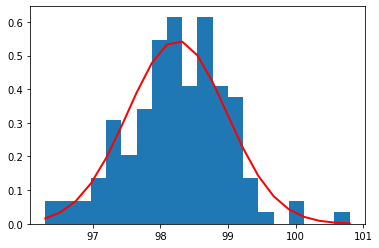

In [42]:
count, bins, ignored = plt.hist(df['temperature'],20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [43]:
from scipy.stats import shapiro
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


Based on the Shapiro test, we conclude that the test shape is Gaussian

2. Is the sample size large? Are the observations independent?

Yes it is since we have more than 30 samples. They are independent sinze we assume that they belong to different people.

3. Is the true population mean really 98.6 degrees F?

We will use a one sample test since there is not distribution provided for Wunderlich's measurement only the mean.

In [79]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

wunderlich_temp = 98.6
measure_shifted = df['temperature'] - np.mean(df['temperature']) + wunderlich_temp

def diff_from_wunderlich(data, wunderlich_value=98.6):
    return np.mean(data) - wunderlich_value

diff_obs = diff_from_wunderlich(df['temperature'])
print(diff_obs)

rep = 10000
bs_replicates = draw_bs_reps(measure_shifted, np.mean, rep)
p_value = np.sum(bs_replicates >= np.mean(df['temperature'])) / rep
print('the p value is :', p_value)

-0.35076923076921673
the p value is : 1.0


In [72]:
p_value

1.0

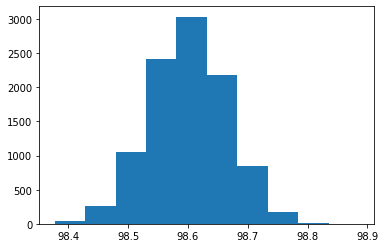

98.60063553846153
98.24923076923078


In [83]:
plt.hist(bs_replicates)
plt.show()
print(np.mean(bs_replicates))
print(np.mean(df['temperature']))

Therefore, there is definitely a significant difference between the measurements and the proposed mean.
Since the number of samples is bigger than 30 then we use a z test. Otherwise we would need to use a t-test

In [84]:
rep = 10
bs_replicates = draw_bs_reps(measure_shifted, np.mean, rep)
p_value = np.sum(bs_replicates >= np.mean(df['temperature'])) / rep
print('the p value is :', p_value)

the p value is : 1.0


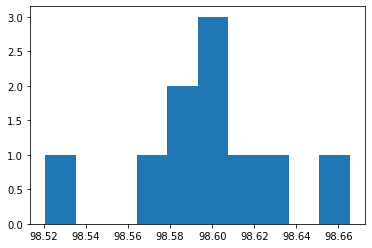

98.59730769230768
98.24923076923078


In [85]:
plt.hist(bs_replicates)
plt.show()
print(np.mean(bs_replicates))
print(np.mean(df['temperature']))

In [123]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
z_score = (true_mu-mean)/std
p_value = scipy.stats.norm.sf(abs(z_score))*2
print("z score is: ", z_score)
print("p value is: ", p_value)

z score is:  0.48027041116080765
p value is:  0.6310351255854851


If we use the z statistic the p-value is significant.

In [108]:
import scipy
true_mu = 98.6

t_stat, p_val = scipy.stats.ttest_1samp(df['temperature'], true_mu)

print('Test Statistic =', t_stat)
print('P-value =', p_val)

Test Statistic = -5.4548232923645195
P-value = 2.4106320415561276e-07


Since the p-value <.05 we cannot reject the null hypothesis that they mean is different.

4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [115]:
df_small = np.random.choice(df['temperature'],10)

Since the sample size is small we need to use the t statistic

In [118]:
t_stat, p_val = scipy.stats.ttest_1samp(df_small, true_mu)

print('Test Statistic =', t_stat)
print('P-value =', p_val)

Test Statistic = -1.9058791118818508
P-value = 0.0890468359627656


In [122]:
mean = np.mean(df_small)
std = np.std(df_small)
z_score = (true_mu-mean)/std
p_value = scipy.stats.norm.sf(abs(z_score))*2
print("z score is: ", z_score)
print("p value is: ", p_value)

z score is:  0.6352930372939503
p value is:  0.525237313827152


The difference between the p-scores is large. It shows that they can vary greatly depending on the number of data points.

5. At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

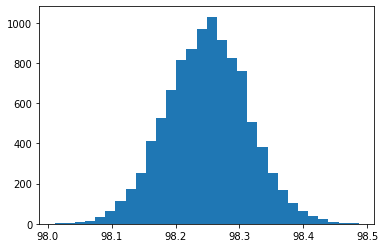

Confidence interval is  [98.12382692 98.37461538]
Standard error is  0.12763790921316306


In [128]:
n_samples = 10000
bs_replicates = np.empty(n_samples)
for i in range(n_samples):
    bs_replicates[i] = bootstrap_replicate_1d(df['temperature'], np.mean)
plt.hist(bs_replicates, bins=30)
plt.show()
conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('Confidence interval is ', conf_int)
print('Standard error is ',2*np.std(bs_replicates))

6. Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [140]:
n_samples = 10000
mean_temperature = np.mean(df['temperature'])
temp_M = df['temperature'].loc[df['gender']=='M']
temp_F = df['temperature'].loc[df['gender']=='F']
temp_M_shifted = temp_M - np.mean(temp_M) - mean_temperature
temp_F_shifted = temp_F - np.mean(temp_F) - mean_temperature
empirical_diff_means = np.mean(temp_M) - np.mean(temp_F)
bs_replicates_M = draw_bs_reps(temp_M_shifted, np.mean, size=n_samples)
bs_replicates_F = draw_bs_reps(temp_F_shifted, np.mean, size=n_samples)
bs_replicates = bs_replicates_M - bs_replicates_F

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.99


Given that the difference is almost always higher that means the the tempareture difference is significant